In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import pandas as pd

In [22]:
# Fitness_value_ObesityDataSet.csv      d = 16
# Fitness_value_winequality-white.csv   d = 11
# Fitness_value_magic04.csv             d = 10
name = 'Fitness_value_magic04.csv'

In [23]:
lookup_table = pd.read_csv(name, header=None).values.flatten()[:-1]

In [24]:
num_features = 10
combinations = np.array(list(product([0, 1], repeat=num_features)))[1:]
print(len(lookup_table))
print(combinations)

1023
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 1]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


In [25]:
def bitstring_to_index(features_used):
    index = -1 
    for i, bit in enumerate(reversed(features_used)):
        index += bit * (2 ** i) 
    return index

def fitness_function(features_used):
    lookup_table_index = bitstring_to_index(features_used)
    accuracy = lookup_table[lookup_table_index]
    error = 1 - accuracy
    penalty_weight = 0.001
    fitness = error + penalty_weight * sum(features_used)
    return fitness

fitness_values = []
for current in combinations:
    fitness_value = fitness_function(current)
    fitness_values.append(fitness_value)
print(len(fitness_values))
fitness_values

1023


[0.3461629863301787,
 0.2657213459516299,
 0.2301808622502629,
 0.28175709779179814,
 0.28591167192429023,
 0.23307255520504733,
 0.21645951629863303,
 0.2759737118822292,
 0.27513354363827547,
 0.19416614090431128,
 0.18675394321766559,
 0.2675099894847529,
 0.2645667718191378,
 0.19411461619348058,
 0.18643953732912721,
 0.3090967402733964,
 0.2977413249211357,
 0.22518611987381698,
 0.2041041009463722,
 0.27828811777076756,
 0.2740304942166141,
 0.21330494216614093,
 0.20142376445846477,
 0.2725047318611987,
 0.2706130389064143,
 0.1920115667718192,
 0.1835478443743428,
 0.26614405888538384,
 0.26372660357518407,
 0.19537749737118826,
 0.1877024185068349,
 0.3401167192429022,
 0.33033859095688745,
 0.23596424815983175,
 0.21514511041009465,
 0.2790767613038907,
 0.2779737118822292,
 0.2167223974763407,
 0.2043154574132492,
 0.2717160883280757,
 0.270875920084122,
 0.19148580441640384,
 0.1835478443743428,
 0.2593091482649842,
 0.2589947423764458,
 0.19090851735015768,
 0.18691377497

In [26]:
# Applica t-SNE
embedding = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(combinations)

In [27]:
fitness_values = [1 - x for x in fitness_values]

In [ ]:
a = [bitstring_to_index([0, 1, 1, 0, 1, 1, 1, 1, 1, 1]),
bitstring_to_index([0, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
bitstring_to_index([1, 1, 1, 0, 0, 1, 1, 0, 1, 1]),
bitstring_to_index([1, 1, 1, 0, 1, 0, 0, 0, 1, 0]),
bitstring_to_index([1, 1, 1, 0, 1, 0, 0, 1, 1, 1]),
bitstring_to_index([1, 1, 1, 0, 1, 1, 0, 1, 1, 0]),
bitstring_to_index([1, 1, 1, 0, 1, 1, 1, 0, 1, 0]),
bitstring_to_index([1, 1, 1, 1, 0, 0, 0, 0, 1, 0]),
bitstring_to_index([1, 1, 1, 1, 0, 0, 0, 1, 1, 1]),
bitstring_to_index([1, 1, 1, 1, 0, 0, 1, 0, 1, 1]),
bitstring_to_index([1, 1, 1, 1, 0, 0, 1, 1, 1, 0]),
bitstring_to_index([1, 1, 1, 1, 0, 1, 0, 1, 1, 0]),
bitstring_to_index([1, 1, 1, 1, 1, 0, 0, 0, 1, 1]),
bitstring_to_index([1, 1, 1, 1, 1, 0, 0, 1, 1, 0]),
bitstring_to_index([1, 1, 1, 1, 1, 1, 0, 0, 1, 0])]

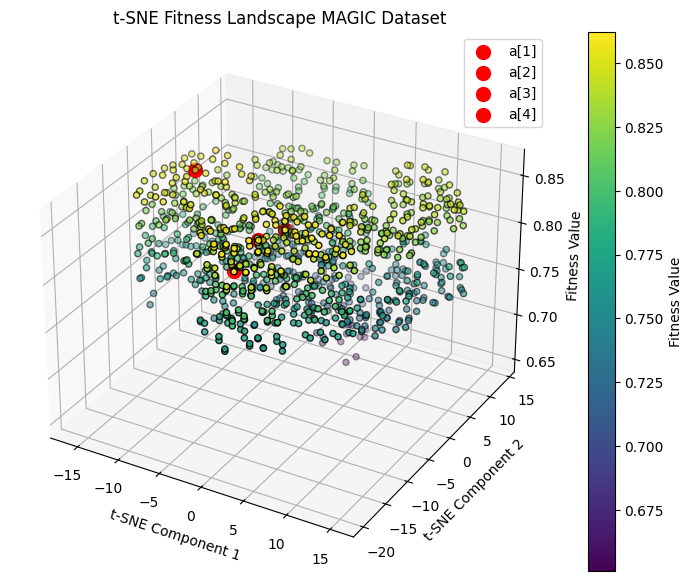

In [42]:
# 5. Visualizzare il fitness landscape in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embedding[:, 0], embedding[:, 1], fitness_values, c=fitness_values, cmap='viridis', edgecolor='k')
ax.scatter(embedding[a[1], 0], embedding[a[1], 1], fitness_values[a[1]], color='red', s=100, label='a[1]')
ax.scatter(embedding[a[2], 0], embedding[a[2], 1], fitness_values[a[2]], color='red', s=100, label='a[2]')
ax.scatter(embedding[a[3], 0], embedding[a[3], 1], fitness_values[a[3]], color='red', s=100, label='a[3]')
ax.scatter(embedding[a[4], 0], embedding[a[4], 1], fitness_values[a[4]], color='red', s=100, label='a[4]')
#ax.set_zlim(0.2, 0.7)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('Fitness Value')
ax.set_title('t-SNE Fitness Landscape MAGIC Dataset')
ax.legend()
fig.colorbar(sc, label='Fitness Value')
plt.show()

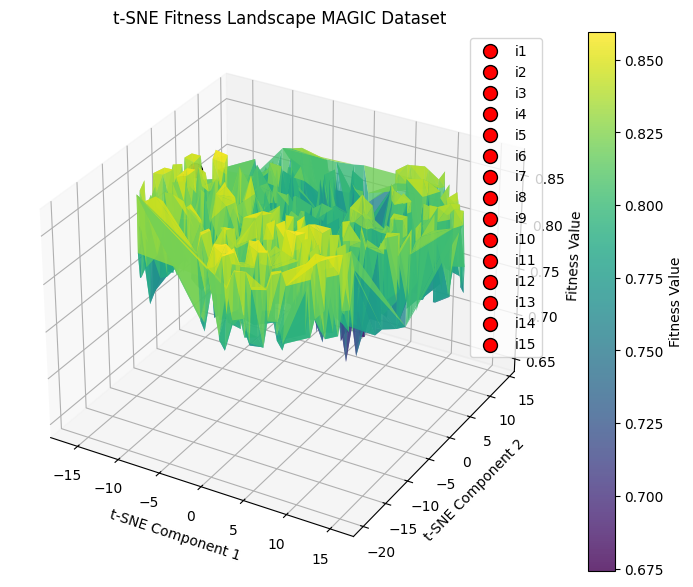

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creiamo la triangolazione per la superficie
tri = Delaunay(embedding[:, :2])  # Usa solo le prime due componenti
# Creiamo la superficie e salviamo l'oggetto per la colorbar
surface = ax.plot_trisurf(
    embedding[:, 0], embedding[:, 1], fitness_values, triangles=tri.simplices,
    cmap='viridis', edgecolor='none', alpha=0.8
)
# Evidenziamo i punti specifici con colori diversi
highlight_points = a
highlight_colors = ['red', 'red', 'red', 'red', 'red','red', 'red', 'red', 'red', 'red','red', 'red', 'red', 'red', 'red']

for idx, color in zip(highlight_points, highlight_colors):
    ax.scatter(embedding[idx, 0], embedding[idx, 1], fitness_values[idx], 
               color=color, s=100, edgecolors='k', label=f'i{highlight_points.index(idx) + 1}')


# Etichette e titolo
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('Fitness Value')
ax.set_title('t-SNE Fitness Landscape MAGIC Dataset')
ax.legend()

# Aggiungiamo la colorbar collegata alla superficie
fig.colorbar(surface, ax=ax, label='Fitness Value')

# Mostriamo il grafico
plt.show()

NameError: name 'i1' is not defined

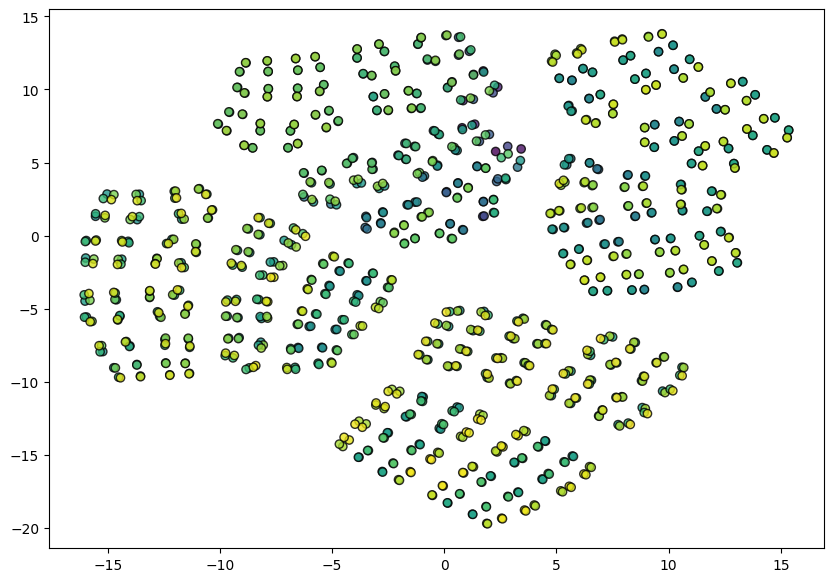

In [ ]:
# Visualizzazione in 2D del fitness landscape
fig, ax = plt.subplots(figsize=(10, 7))
sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=fitness_values, cmap='viridis', edgecolor='k', alpha=0.8)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_title('t-SNE Fitness Landscape in 2D')
ax.legend()
fig.colorbar(sc, label='Fitness Value')

plt.show()
